In [392]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import itertools

# Loading the dataset

In [8]:
dataset = sklearn.datasets.load_breast_cancer()
data = dataset["data"]
target = dataset["target"]

# EDA- Data cleaning and scaling

In [9]:
scaler = preprocessing.MinMaxScaler()
data = scaler.fit_transform(data)

In [10]:
data = pd.DataFrame(data, columns=dataset["feature_names"]) # use data.to_numpy() to revert back to numpy
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [11]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

# Principal component analysis

Text(0.5, 1.0, 'Scatter plot of PCA with blue as Class 1 and red as Class 2')

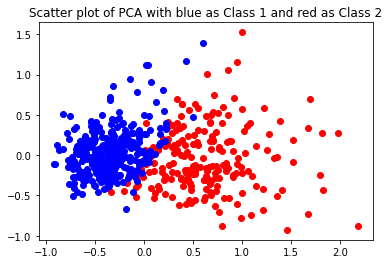

In [219]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
comp1 = principalDf["principal component 1"].to_numpy()
comp2 = principalDf["principal component 2"].to_numpy()
comp1 = np.expand_dims(comp1, axis = 1)
comp2 = np.expand_dims(comp2, axis = 1)
data_pca = np.concatenate((comp1, comp2), axis=1)
filter_ = (target==0)
plt.scatter(comp1[filter_], comp2[filter_],
           c = ['r'])
plt.scatter(comp1[~filter_], comp2[~filter_],
           c = ['b'])
plt.title("Scatter plot of PCA with blue as Class 1 and red as Class 2")

# Correlation plots

<AxesSubplot:>

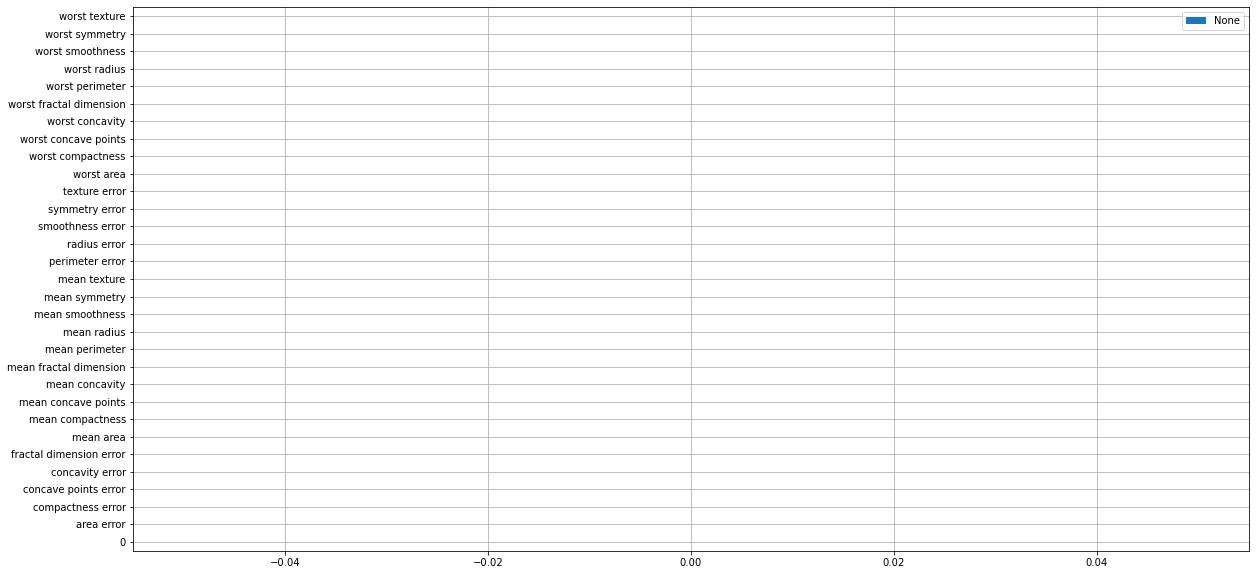

In [13]:
# Correlation of target
target = pd.DataFrame(target)
data.corrwith(target).plot(kind='barh',figsize=[20,10], legend=True,grid=True)

In [14]:
# Point biserial correlation plot, used when one variable is categorical, returns r and p value
from scipy import stats
r_list, p_list = [], []
for col in data.columns:
    r, p = stats.pointbiserialr(np.squeeze(target.to_numpy()), np.squeeze(data[[col]].to_numpy()))
    r_list.append(r)
    p_list.append(p)

<BarContainer object of 30 artists>

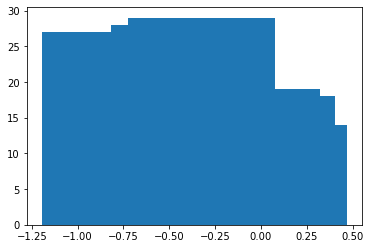

In [220]:
plt.bar(r_list, np.arange(len(r_list)))

<BarContainer object of 30 artists>

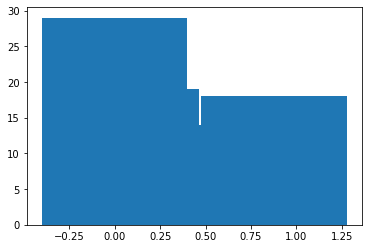

In [222]:
plt.bar(p_list, np.arange(len(p_list)))

# Kmeans clustering on original data and PCA data using custom kmeans function

In [235]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [247]:
def print_metrics(y_true, y_pred):    
    print(f"The precision is: {precision_score(y_true, y_pred)}")
    print(f"The recall is: {recall_score(y_true, y_pred)}")
    print(f"The accuracy is: {accuracy_score(y_true, y_pred)}")
    print(f"The f1-score is: {f1_score(y_true, y_pred)}")
    print("The confusion matrix is given below:")
    cm = confusion_matrix(y_true, y_pred)
    target_names = ["class1", "class2"]
    plot_confusion_matrix(cm, classes=target_names,
                          title='Confusion matrix')
    plt.show()

In [250]:
def kmeans_clustering(_input, clusters):
    
    # Initialize centroids/means
    mean1 = np.random.rand(_input.shape[1])
    mean2 = np.random.rand(_input.shape[1])
    
    # Assign clusters to data points
    mean1_old = np.zeros(_input.shape[1])
    while all(mean1_old!=mean1):
        C = np.empty(0)
        for point in _input:
            dist1 = np.linalg.norm(point - mean1)
            dist2 = np.linalg.norm(point - mean2)
            if dist1<dist2:
                C = np.append(C, 1)
            else:
                C = np.append(C, 0)

        # Update cluster means
        filter_ = (C==1)
        mean1_old = mean1
        mean1 = _input[filter_].mean(axis =0)
        mean2 = _input[~filter_].mean(axis =0)
    return C

The precision is: 0.9157894736842105
The recall is: 0.9747899159663865
The accuracy is: 0.9279437609841827
The f1-score is: 0.9443690637720488
The confusion matrix is given below:


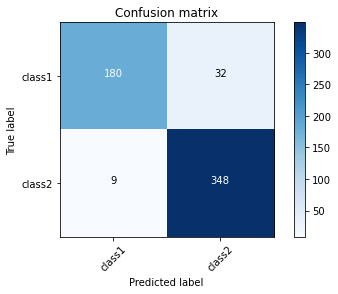

In [255]:
data_input = data.to_numpy()
C1 = kmeans_clustering(data_input, clusters=2)
print_metrics(target, C1)

The precision is: 0.9157894736842105
The recall is: 0.9747899159663865
The accuracy is: 0.9279437609841827
The f1-score is: 0.9443690637720488
The confusion matrix is given below:


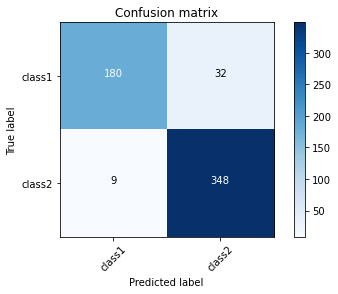

In [258]:
C2 = kmeans_clustering(data_pca, clusters=2)
print_metrics(target, C2)

Text(0.5, 1.0, 'Clusters formed by applying kmeans to PCA1 and PCA2')

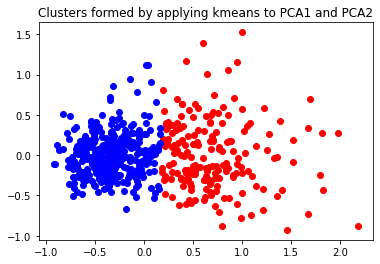

In [218]:
filter_ = (C==0)
plt.scatter(comp1[filter_], comp2[filter_],
           c = ['r'])
plt.scatter(comp1[~filter_], comp2[~filter_],
           c = ['b'])
plt.title("Clusters formed by applying kmeans to PCA1 and PCA2")

# Using kmeans from sklearn

In [266]:
kmeans = KMeans(init="random",n_clusters=2,n_init=20,max_iter=100)
kmeans.fit(data)

KMeans(init='random', max_iter=100, n_clusters=2, n_init=20)

The precision is: 0.9157894736842105
The recall is: 0.9747899159663865
The accuracy is: 0.9279437609841827
The f1-score is: 0.9443690637720488
The confusion matrix is given below:


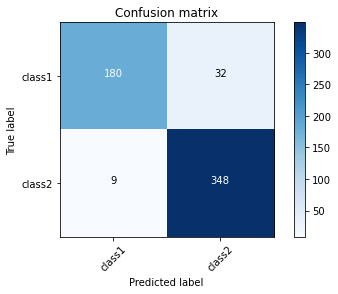

In [267]:
print_metrics(target, kmeans.labels_)

# Using DBScan from sklearn

In [386]:
dbscan = DBSCAN(eps=0.4, min_samples=10).fit(data)

array([-1,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0,
       -1, -1,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,
       -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,
       -1,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0

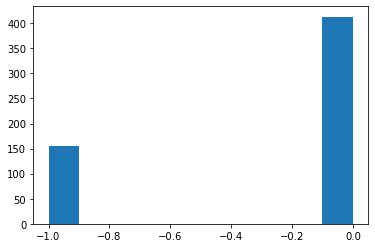

In [387]:
plt.hist(dbscan.labels_)
dbscan.labels_

In [391]:
dbscan = DBSCAN(eps=0.2, min_samples=20).fit(data_pca)

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

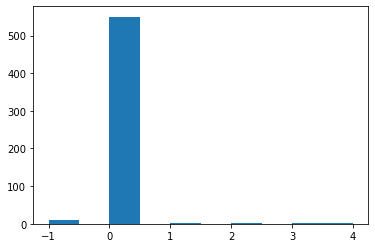

In [390]:
plt.hist(dbscan.labels_)
dbscan.labels_

# Findings
No difference found between performance of sklearn kmeans and kmeans implementation from scratch. Also, no difference in performance found on PCA data. However, performance of DBSCAN algorithm is different.